In [52]:
import numpy as np
from sympy.geometry import *
import matplotlib.pyplot as plt
import scipy.constants

# All distances are in meters

# create points and lines for the tag.
# TODO: Change this for variable tag geometry?
# TODO: Convert script to work in 3D?

top_of_tag_center = Point(0, 0.0284)
top_left_tag_corner = Point(-0.0245, 0.0284)
top_right_tag_corner = Point(0.0245, 0.0284)

top_tag_line = Line(top_left_tag_corner, top_right_tag_corner)

bottom_left_tag_corner = Point(-0.04695, 0)
bottom_right_tag_corner = Point(0.04695, 0)



left_tag_point = Point(-0.03493, 0.0164)
right_tag_point = Point(0.03493, 0.0164)

# wavelength in meters of 24 GHz
wavelength = 0.0124876
pi = scipy.constants.pi



Text(0.5, 1.0, 'Relative phase change for radar passing over tag')

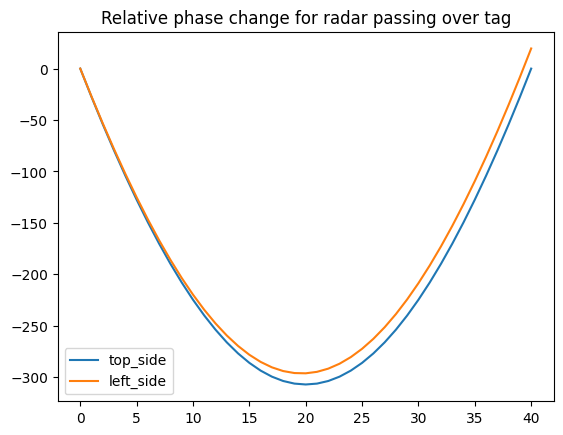

In [4]:


Y_DISTANCE = 3
num_points = 41  # From -20 to 0 inclusive
output = np.zeros((num_points, 3))  # 3 columns: angle, toplen, sidelen


for idx, i in enumerate(range(-20, 21)):
    x_distance = i / 10
    radar = Point(x_distance, Y_DISTANCE)
    top_line = Segment(top_of_tag_center, radar)
    left_side_line = Segment(left_tag_point, radar)

    # Calculate values
    angle = top_tag_line.angle_between(top_line).evalf()
    toplen = top_line.length.evalf()
    sidelen = left_side_line.length.evalf()

    # Store in NumPy array
    output[idx] = [angle, toplen, sidelen]

phase_accumulated_top = output[:,1] * (2 * pi / 0.0124876) # What is the total phase accumulated through the wave travel?
initial_top_phase = phase_accumulated_top[0]
relative_phase_change_top = phase_accumulated_top - initial_top_phase   # what is the phase change since the start of measurement?

phase_accumulated_side = output[:,2] * (2 * pi / 0.0124876)
initial_side_phase = phase_accumulated_side[0]
relative_phase_change_side = phase_accumulated_side - initial_side_phase

plt.plot(relative_phase_change_top, label='top_side')
plt.plot(relative_phase_change_side, label='left_side')
plt.legend()
plt.title("Relative phase change for radar passing over tag")



C:\Users\aplot\AppData\Local\Temp\ipykernel_14668\4033654383.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


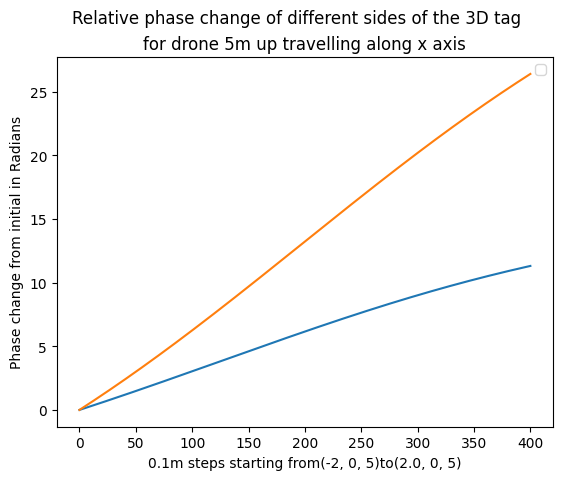

In [61]:
# 3D version
# left and right sides are on the x-axis, front and back are on the y-axis.
front_side_midpoint = Point3D(-0.000237, -0.03624, 0.01537)
right_side_midpoint = Point3D(0.0351175, -0.001, 0.01597)
back_side_midpoint = Point3D(0, 0.03417, 0.0157495)
left_side_midpoint = Point3D(-0.03528, -0.00088, 0.01514)
top_side_midpoint = Point3D(-0.0051, -0.0013, 0.02867)


x_coord = -2
y_coord = 0
z_coord = 5

initial_point = (x_coord, y_coord, z_coord)

num_points = 401
output = np.zeros((num_points, 5))  # 5 columns: front_phase, right_phase, back_phase, left_phase, top_phase

for i in range(0, num_points):
    x_coord = -2 + i / 100

    drone = Point3D(x_coord, y_coord, z_coord)
    front_seg = Segment3D(drone, front_side_midpoint)
    right_seg = Segment3D(drone, right_side_midpoint)
    back_seg = Segment3D(drone, back_side_midpoint)
    left_seg = Segment3D(drone, left_side_midpoint)
    top_seg = Segment3D(drone, top_side_midpoint)

    # print(front_seg.length.evalf(), top_seg.length.evalf())

    front_phase = front_seg.length.evalf() * (2 * pi / 0.0124876)
    right_phase = right_seg.length.evalf() * (2 * pi / 0.0124876)
    back_phase = back_seg.length.evalf() * (2 * pi / 0.0124876)
    left_phase = left_seg.length.evalf() * (2 * pi / 0.0124876)
    top_phase = top_seg.length.evalf() * (2 * pi / 0.0124876)

    output[i] = [front_phase, right_phase, back_phase, left_phase, top_phase]


# Now we have the total phase accumulation over the length travelled. But we want to look at the relative phase change.
# So subtract each column from its first value.

end_point = (round(x_coord, 2), round(y_coord, 2), round(z_coord, 2))

output[:,0] = output[:,0] - output[0,0]
output[:,1] = output[:,1] - output[0,1]
output[:,2] = output[:,2] - output[0,2]
output[:,3] = output[:,3] - output[0,3]
output[:,4] = output[:,4] - output[0,4]

# plt.plot(output[:,0], label='front')
# plt.plot(output[:,1], label='right')
# plt.plot(output[:,2], label='back')
# plt.plot(output[:,3], label='left')
# plt.plot(output[:,4], label='top')

plt.plot(output[:,3] - output[:,4])
plt.plot(output[:,3] - output[:,1])

plt.legend()
plt.suptitle("Relative phase change of different sides of the 3D tag")
plt.title("for drone 5m up travelling along x axis")
plt.ylabel("Phase change from initial in Radians")
plt.xlabel("0.1m steps starting from" + str(initial_point) + "to" + str(end_point))

plt.show()


    

    

In [ ]:
p1 = (-16.188, 4.33, 28.57)
p2 = (6.028, -6.937, 28.772)

# get midpoint and convert to m from mm
xm = (p1[0] + p2[0]) / 2 / 1000
ym = (p1[1] + p2[1]) / 2 / 1000
zm = (p1[2] + p2[2]) / 2 / 1000
print(xm, ym, zm)

print(chr(sum(range(ord(min(str(not())))))))

-0.00508 -0.0013035000000000002 0.028671
ඞ


True

: 